In [1]:
import pandas as pd
import numpy as nm
import matplotlib as plt
import seaborn as sns
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptome Data...
Loading CNA Data...
Loading Phosphoproteomics Data...


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


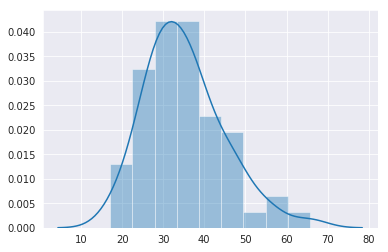

In [2]:
figo_stage_bmi = CPTAC.get_meta_completeness()[['FIGO_stage', 'BMI']]

figo0 = figo_stage_bmi.loc[figo_stage_bmi['FIGO_stage'] == 0]
sns.set_style('darkgrid')
sns.distplot(figo0[['BMI']])

#How are we going to get a separate graph for each FIGO stage?